In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns


TRAIN_PATH = '123181_train_withF_cutMax.csv'
TEST_PATH = '123181_test_withF.csv'

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

print(train.columns)


Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Avg', 'log_ret_close_1min', 'MACD_close_F12S26S9', 'RSI_close_12min',
       'log_ret_avg_1min', 'MACD_avg_F12S26S9', 'RSI_avg_12min', 'SAR',
       'BB_hit_wall', 'Target_Close_1min', 'Target_Avg_1min',
       'Target_Close_5min', 'Target_Avg_5min', 'STOCK_log_ret_close_1min',
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min',
       'STOCK_log_ret_avg_1min', 'STOCK_MACD_avg_F12S26S9',
       'STOCK_RSI_avg_12min', 'STOCK_SAR', 'STOCK_BB_hit_wall'],
      dtype='object')


Train Model

In [44]:
def experiment(train, test, target):
    model = LinearRegression()

    train_input = train[['MACD_avg_F12S26S9', 'RSI_avg_12min',
       'BB_hit_wall', 'STOCK_MACD_close_F12S26S9', 
       'STOCK_RSI_close_12min','STOCK_BB_hit_wall']]
    
    test_input = test[['MACD_avg_F12S26S9', 'RSI_avg_12min',
       'BB_hit_wall', 'STOCK_MACD_close_F12S26S9', 
       'STOCK_RSI_close_12min','STOCK_BB_hit_wall']]

    model.fit(train_input, train[target])

    predictions = model.predict(test_input)

                
    # Results
    print(model.coef_)
    print("MSE: %5f"%mean_squared_error(test[target],predictions))
    print("R^2: %5f"%r2_score(test[target],predictions))


In [45]:
experiment(train = train, test = test, target= 'Target_Avg_1min')

[-5.55470760e-04 -5.36612335e-06  2.02605397e-04  2.00119200e-04
  8.63940581e-05 -7.34935107e-04]
MSE: 0.000004
R^2: -0.081140


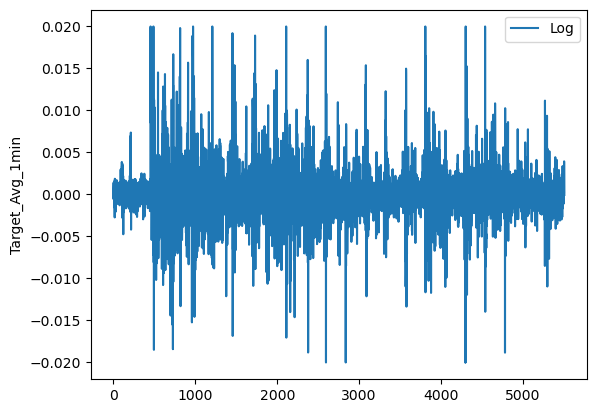

In [46]:
sns.lineplot(data=train['Target_Avg_1min'], label='Log')
plt.legend()
plt.show()